# **Sendy Logistics Challenge: EDSA**
### **Team1**


# **Introduction**

# **Notebook Outline**

    1. Libraries and Data importing
        1.1 Importing Libraries
        1.2 Importing Data
    2. Data Preprocessing
        2.1 Data Cleaning
        2.2 Missing Variables
        2.2 Encoding
    3. Exploratory Data Analysis
    4. Feature Engineering and Selection
    5. Model Desgining
    6. Model Evaluation
    7. Model Analysis
    8. Contributors
    9. References

# **0. Installations**

In [75]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# **1. Libraries and Data importing**

## **1.1 Importing Libraries**

 Import Python libraries

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


## **1.2 Importing Data**

We will load our data as a Pandas DataFrame

In [219]:
test_df = pd.read_csv('data/Test.csv')
train_df = pd.read_csv('data/Train.csv')
riders_df = pd.read_csv('data/Riders.csv')

# **2 Data Preprocessing**

## **2.1 Dataset Overview**

In [220]:
train_df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [221]:
test_df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868


In [222]:
riders_df.head(20)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156
5,Rider_Id_720,2608,1798,13.2,504
6,Rider_Id_95,3464,1304,13.4,950
7,Rider_Id_122,4831,2124,14.1,1469
8,Rider_Id_900,1936,1436,14.2,610
9,Rider_Id_196,550,2379,13.4,224


## **2.2 Merge data**

In [223]:
testcols = train_df.columns # getting a list of the test columns
newtrain = train_df[testcols] # Refining the train columns to align to test columns
y = np.array(train_df["Time from Pickup to Arrival"]).reshape(-1,1) #assigning the target variable

In [224]:
print(newtrain.columns)
print(test_df.columns)

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placem

### Combining the dataset

In [225]:
df = pd.concat([newtrain, ftest])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


### Merging Dataframe with Rider details

In [226]:
df = df.merge(riders_df, how = 'left', on = 'Rider Id')


Some of the columns have white space that we want to replace with an underscore (to avoid using the column names as variable names later on).

In [227]:
df.columns = [col.replace(" ","_") for col in df.columns]
df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,2311,872,14.1,533


In [228]:
df.shape

(28269, 33)

In [229]:
df.fillna(0, axis=1)

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,0.0,1018,504,13.1,87
28265,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,0.0,6728,2702,13.9,2027
28266,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,0.0,1601,1337,13.7,441
28267,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,0.0,225,878,14.1,66


## **2.2 Summary Statistics**

In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 28268
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order_No                                   28269 non-null  object 
 1   User_Id                                    28269 non-null  object 
 2   Vehicle_Type                               28269 non-null  object 
 3   Platform_Type                              28269 non-null  int64  
 4   Personal_or_Business                       28269 non-null  object 
 5   Placement_-_Day_of_Month                   28269 non-null  int64  
 6   Placement_-_Weekday_(Mo_=_1)               28269 non-null  int64  
 7   Placement_-_Time                           28269 non-null  object 
 8   Confirmation_-_Day_of_Month                28269 non-null  int64  
 9   Confirmation_-_Weekday_(Mo_=_1)            28269 non-null  int64  
 10  Confirmation_-_Time   

- The train_df.info() outputs the number of non-null entries in each column. As such, we are certain that our data has missing values in **Temperature** and **Precipitation_in_millimeters** columns as the columns have a varying number of non-null entries

- All input data for regression model building purposes needs to be numerical. All time columns, Order_No, User_Id,Vehicle_Type,Business_or_Personal columns are not numerical. We therefore have to transform the text data into numbers before we can train our machine learning model.

Now let's look at a table showing the summary statistics of the data.

In [231]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform_Type,28269.0,2.752167,0.624872,1.000000,3.000000,3.000000,3.000000,4.000000
Placement_-_Day_of_Month,28269.0,15.645725,8.793210,1.000000,8.000000,15.000000,23.000000,31.000000
Placement_-_Weekday_(Mo_=_1),28269.0,3.242527,1.570692,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival_at_Pickup_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival_at_Pickup_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival_at_Destination_-_Day_of_Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


Based on the **means** and **standard deviations** of different columns, we may consider **standardizing** our data.

## **2.3  Addressing Missing Values**

Model can not handle missing data and a solution to that is to replace missing value with another value (mean, median and mode).

Pandas provides functions to check the number of missing values in the dataset. Missingno library takes it one step further and provides the distribution of missing values in the dataset by informative visualizations. Using the plots of missingno, we are able to see where the missing values are located in each column and if there is a correlation between missing values of different columns. 

Before handling missing values, it is very important to explore them in the dataset. 

In [232]:
df.isnull().sum()

Order_No                                         0
User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month         7068
Arrival_at_Destination_-_Weekday_(Mo_=_1)     7068
Arrival_at_Destination_-_Time  

**The Matrix:**

Using matrix we can  quickly find the pattern of missingness in the dataset.

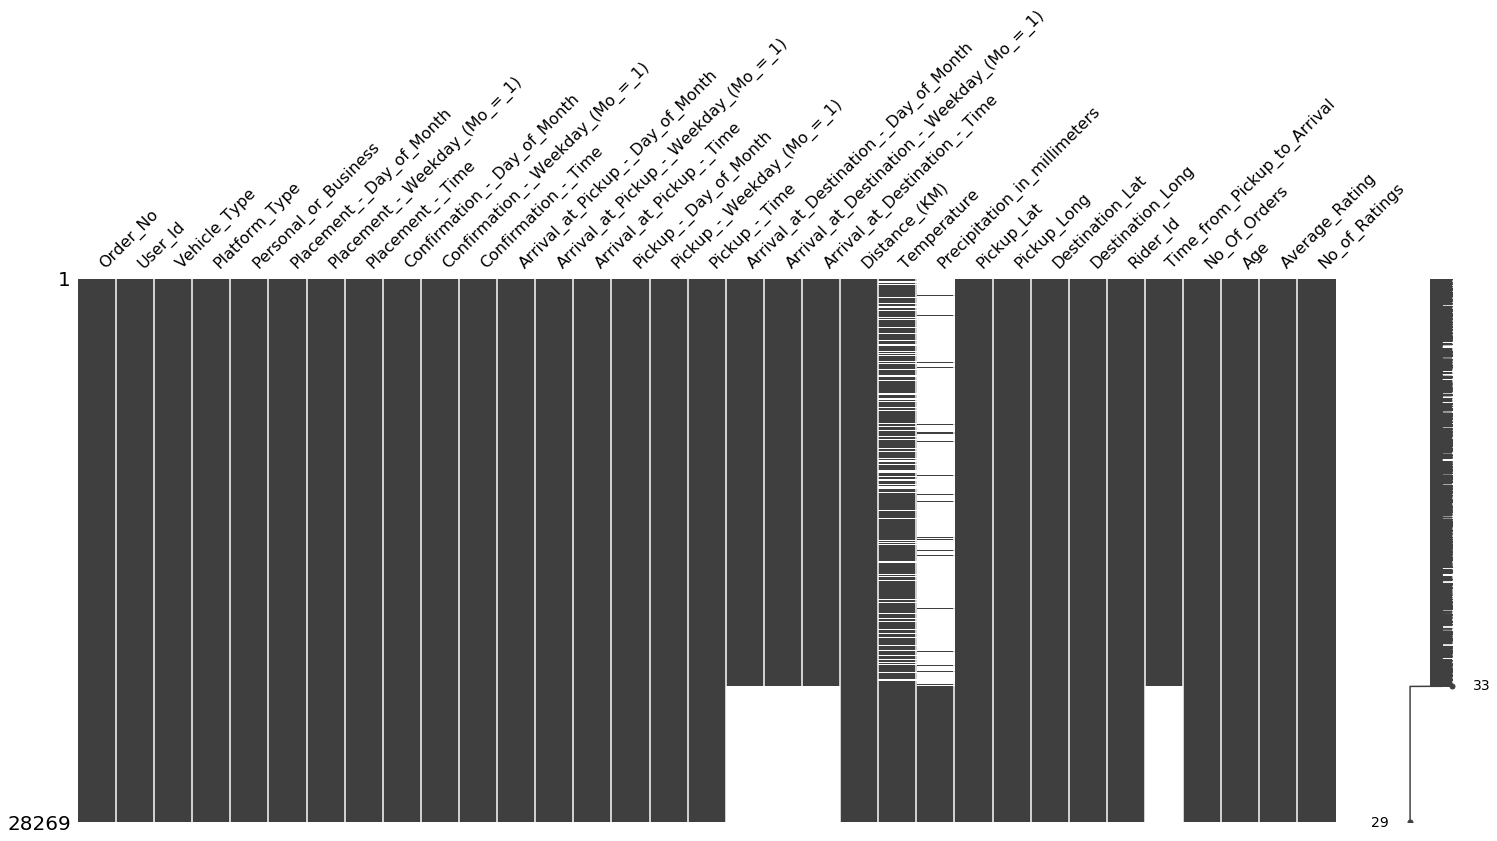

In [233]:
msno.matrix(df)
plt.show()

The plot above shows the amount and positions of missing values. The idea is to capture not only missing values, but also data sparsity.Temparature and participation_in millimetes have some missing values while the is no pattern detected from there missing values.

**The bar chart:**

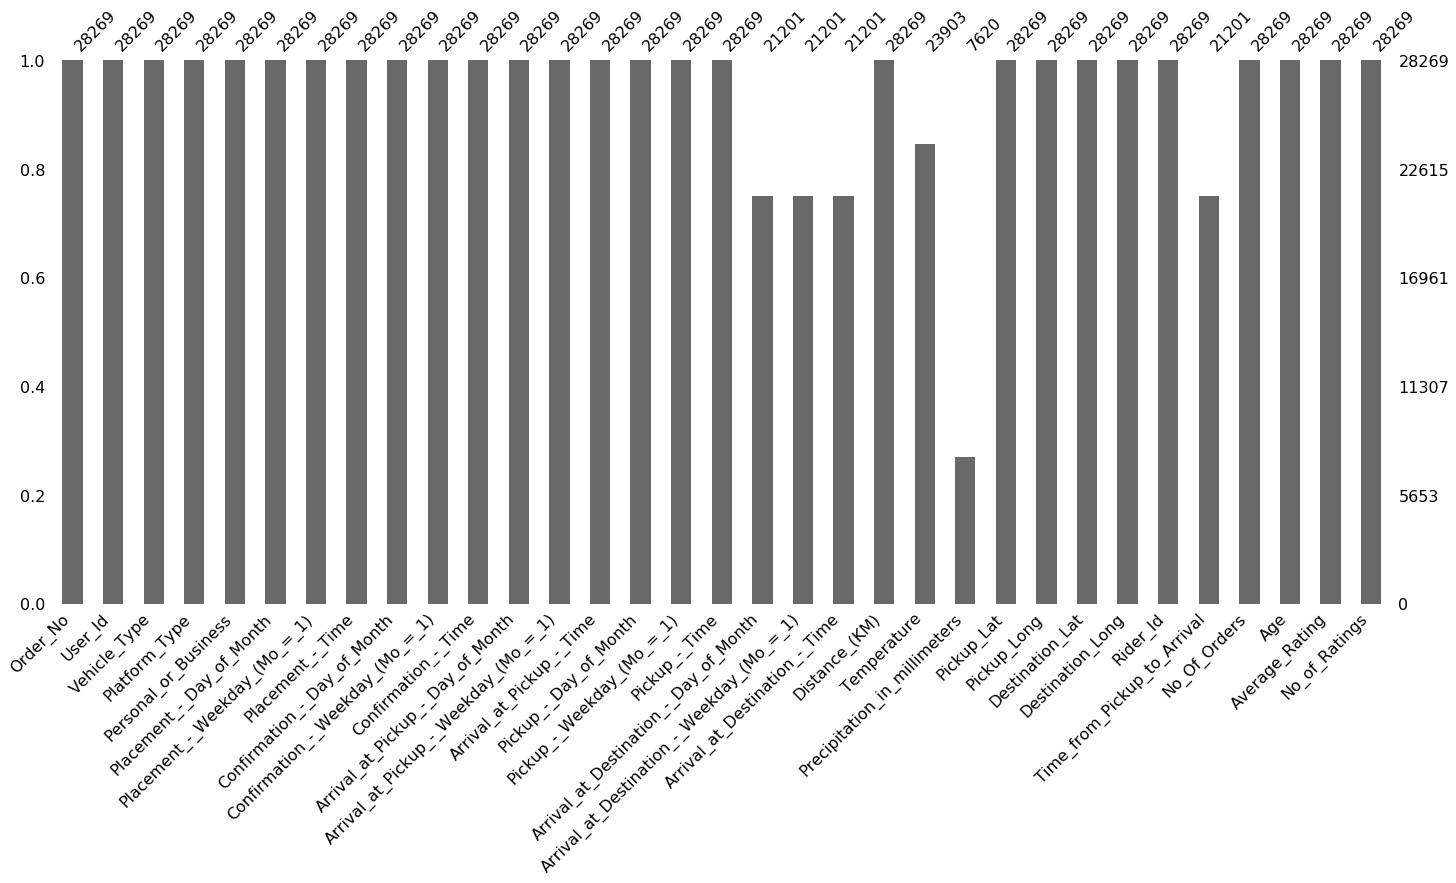

In [234]:
msno.bar(df)

The bar plot shows bars that are proportional to the number of non-missing values as well as providing the actual number of non-missing values. We get an idea of how much of each column is missing. Less than 20% of Temperature data is missing while precipitation_in_millimeters has quite a hug number of missing values approximately more that 70% of the data is missing. The next quetion will be is it valuable to keep the precipitation_in_millimeters coulmn?

**Drop precipitation_in_millimeters**

In [235]:
new_df = df.drop(['Precipitation_in_millimeters'], axis = 1)

**Replacing missing values in Temperature with median**

In [236]:

new_df['Temperature'].fillna(new_df['Temperature'].mean(), inplace=True)
#df['Precipitation_in_millimeters'].fillna(df['Precipitation_in_millimeters'].mean(), inplace=True)

In [237]:
new_df.isnull().sum()

Order_No                                        0
User_Id                                         0
Vehicle_Type                                    0
Platform_Type                                   0
Personal_or_Business                            0
Placement_-_Day_of_Month                        0
Placement_-_Weekday_(Mo_=_1)                    0
Placement_-_Time                                0
Confirmation_-_Day_of_Month                     0
Confirmation_-_Weekday_(Mo_=_1)                 0
Confirmation_-_Time                             0
Arrival_at_Pickup_-_Day_of_Month                0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)            0
Arrival_at_Pickup_-_Time                        0
Pickup_-_Day_of_Month                           0
Pickup_-_Weekday_(Mo_=_1)                       0
Pickup_-_Time                                   0
Arrival_at_Destination_-_Day_of_Month        7068
Arrival_at_Destination_-_Weekday_(Mo_=_1)    7068
Arrival_at_Destination_-_Time                7068


# **3. Exploratory Data Analysis**

## **3.1 Addressing Outliers**

Outlier is an observation point that is distant from other observations. Box-plot are useful for viewing outliers,an outlier is defined as a data point that is located outside the whiskers of the box plot.

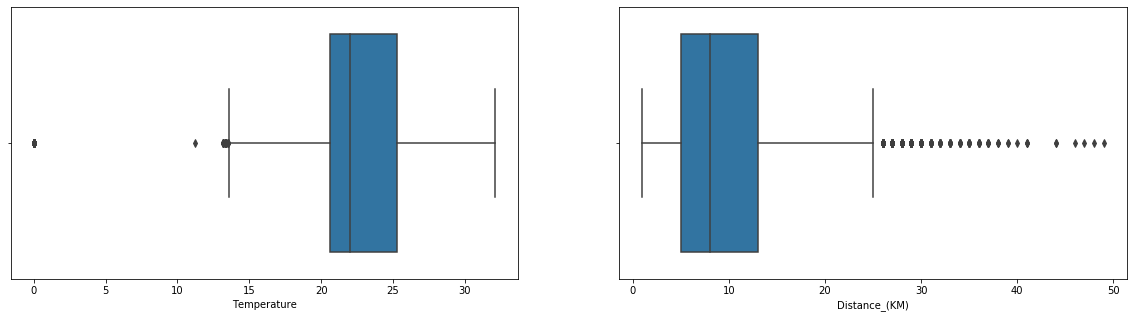

In [239]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(new_df['Temperature'], ax=ax[0])
sns.boxplot(new_df['Distance_(KM)'], ax=ax[1])
plt.show()

## **3.2 Checking for Linearity**

## **3.3 Checking for Multicollinearity**

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.


## **3.4 Distribution of the predict**

Seaborn distplot lets you show a histogram with a line on it.

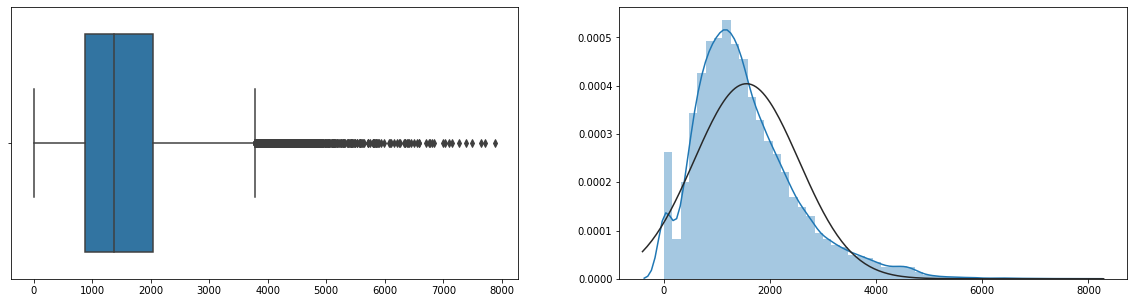

In [240]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(y, ax=ax[0])
sns.distplot(y, fit=norm)

# **4. Feature Engineering and Selection**

## 4.1 Base Model

### Converting Objects to Datetime

In [241]:
new_df['Pickup_-_Time'] = pd.to_datetime(new_df['Pickup_-_Time'])
new_df['Confirmation_-_Time'] = pd.to_datetime(new_df['Confirmation_-_Time'])
new_df['Arrival_at_Pickup_-_Time'] = pd.to_datetime(new_df['Arrival_at_Pickup_-_Time'])
new_df['Placement_-_Time'] = pd.to_datetime(new_df['Placement_-_Time'])

### Creating new variables

In [17]:
new_df['Time_from_Placement_to_Confirmation'] = (new_df['Confirmation_-_Time'] - new_df['Placement_-_Time']).dt.total_seconds().astype(int)
new_df['Time_from_Confirmation_to_Arrival_at_Pickup'] = (new_df['Arrival_at_Pickup_-_Time'] - new_df['Confirmation_-_Time']).dt.total_seconds().astype(int)
new_df['Time_from_Arrival_at_Pickup_to_Pickup_-_Time '] = (new_df['Pickup_-_Time'] - new_df['Arrival_at_Pickup_-_Time']).dt.total_seconds().astype(int)

## Dropping co-linear variables as well as time variables as they will impact our memory

In [18]:
new_df = new_df.drop(['Placement_-_Day_of_Month','Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Day_of_Month',
              'Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Day_of_Month','Arrival_at_Pickup_-_Weekday_(Mo_=_1)',
             'Pickup_-_Day_of_Month','Pickup_-_Weekday_(Mo_=_1)','Placement_-_Time','Confirmation_-_Time',
             'Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Destination_-_Time'], axis=1)

In [19]:
df_final = new_df.drop(['Order_No','User_Id','Vehicle_Type','Rider_Id','Precipitation_in_millimeters'], axis=1) # Dropping IDs
df_final.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Destination_Lat,Destination_Long,Distance_(KM),Personal_or_Business,Pickup_Lat,Pickup_Long,Platform_Type,Temperature,Time_from_Pickup_to_Arrival,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time
0,9.0,5.0,-1.300406,36.829741,4,Business,-1.317755,36.830370,3,20.4,745.0,264,1477,1363
1,12.0,5.0,-1.295004,36.814358,16,Personal,-1.351453,36.899315,3,26.4,1993.0,425,1021,227
2,30.0,2.0,-1.300921,36.828195,3,Business,-1.308284,36.843419,3,0.0,455.0,199,410,209
3,15.0,5.0,-1.257147,36.795063,9,Business,-1.281301,36.832396,3,19.2,1341.0,31,711,310
4,13.0,1.0,-1.295041,36.809817,9,Personal,-1.266597,36.792118,1,15.4,1214.0,60,455,90


## Calculation of Speed in m/s

In [20]:
df_final['Speed']= (df_final['Distance_(KM)']*1000)/df_final['Time_from_Pickup_to_Arrival']

In [21]:
df_final.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Destination_Lat,Destination_Long,Distance_(KM),Personal_or_Business,Pickup_Lat,Pickup_Long,Platform_Type,Temperature,Time_from_Pickup_to_Arrival,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Speed
0,9.0,5.0,-1.300406,36.829741,4,Business,-1.317755,36.830370,3,20.4,745.0,264,1477,1363,5.369128
1,12.0,5.0,-1.295004,36.814358,16,Personal,-1.351453,36.899315,3,26.4,1993.0,425,1021,227,8.028098
2,30.0,2.0,-1.300921,36.828195,3,Business,-1.308284,36.843419,3,0.0,455.0,199,410,209,6.593407
3,15.0,5.0,-1.257147,36.795063,9,Business,-1.281301,36.832396,3,19.2,1341.0,31,711,310,6.711409
4,13.0,1.0,-1.295041,36.809817,9,Personal,-1.266597,36.792118,1,15.4,1214.0,60,455,90,7.413509


## Dummying out the last categorical column

In [22]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Platform_Type,Temperature,Time_from_Pickup_to_Arrival,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Speed,Personal_or_Business_Personal
0,9.0,5.0,-1.300406,36.829741,4,-1.317755,36.830370,3,20.4,745.0,264,1477,1363,5.369128,0
1,12.0,5.0,-1.295004,36.814358,16,-1.351453,36.899315,3,26.4,1993.0,425,1021,227,8.028098,1
2,30.0,2.0,-1.300921,36.828195,3,-1.308284,36.843419,3,0.0,455.0,199,410,209,6.593407,0
3,15.0,5.0,-1.257147,36.795063,9,-1.281301,36.832396,3,19.2,1341.0,31,711,310,6.711409,0
4,13.0,1.0,-1.295041,36.809817,9,-1.266597,36.792118,1,15.4,1214.0,60,455,90,7.413509,1


### Splitting our dataset again

In [23]:
# y = np.array(df_final["Time_from_Pickup_to_Arrival"]).reshape(-1,1) #assigning the target variable
finaltrain = df_final[:len(train_df)]
finaltest = df_final[len(train_df):]

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Platform_Type                              28269 non-null  int64  
 1   Arrival_at_Destination_-_Day_of_Month      21201 non-null  float64
 2   Arrival_at_Destination_-_Weekday_(Mo_=_1)  21201 non-null  float64
 3   Distance_(KM)                              28269 non-null  int64  
 4   Temperature                                28269 non-null  float64
 5   Pickup_Lat                                 28269 non-null  float64
 6   Pickup_Long                                28269 non-null  float64
 7   Destination_Lat                            28269 non-null  float64
 8   Destination_Long                           28269 non-null  float64
 9   Time_from_Pickup_to_Arrival                21201 non-null  float64
 10  Speed                  

### Train and Test Split - Using test here as validation

In [24]:
x_train, x_val, y_train, y_val = train_test_split(finaltrain, y, test_size = 0.3)

In [25]:
x_train.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Platform_Type,Temperature,Time_from_Pickup_to_Arrival,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Speed,Personal_or_Business_Personal
18602,29.0,6.0,-1.278450,36.798173,3,-1.272895,36.807943,1,28.0,787.0,59,735,419,3.811944,1
8380,5.0,2.0,-1.267759,36.816936,3,-1.290894,36.822971,1,22.9,5.0,36,68,253,600.000000,0
9866,10.0,1.0,-1.282907,36.738903,9,-1.272639,36.794723,3,19.0,3060.0,277,812,313,2.941176,0
7719,15.0,2.0,-1.265715,36.823815,9,-1.318062,36.849326,3,22.8,1057.0,116,18,1002,8.514664,0
14786,11.0,6.0,-1.276245,36.836329,6,-1.297183,36.829507,1,20.9,690.0,15,334,182,8.695652,1


## **2.4 Dummy Variable Encoding**

As mantioned above, we have to transform the text/time stamp data (found within columns such as All time columns, 'Order_No', 'User_Id', 'Vehicle_Type', 'Business_or_Personal') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [ ]:
df.info()

In [ ]:
df.info()

# **5. Model Desgining**

### Model Definition, training, and making predictions on the validation set

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)
val_preds = lr.predict(x_val)

# **6. Model Evaluation**

### Checking the RMSE of the validation prediction

In [27]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [28]:
rmse(y_val, val_preds)

9.80044433638186e-13

# **7. Model Analysis**

### Making prediction on the test set and sending the result to csv for submission

In [29]:
y_pred = lr.predict(finaltest)

In [30]:
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 15 columns):
Arrival_at_Destination_-_Day_of_Month            7068 non-null float64
Arrival_at_Destination_-_Weekday_(Mo_=_1)        7068 non-null float64
Destination_Lat                                  7068 non-null float64
Destination_Long                                 7068 non-null float64
Distance_(KM)                                    7068 non-null int64
Pickup_Lat                                       7068 non-null float64
Pickup_Long                                      7068 non-null float64
Platform_Type                                    7068 non-null int64
Temperature                                      7068 non-null float64
Time_from_Pickup_to_Arrival                      7068 non-null float64
Time_from_Placement_to_Confirmation              7068 non-null int32
Time_from_Confirmation_to_Arrival_at_Pickup      7068 non-null int32
Time_from_Arrival_at_Pickup_to_Pickup_-_Time     

In [31]:
submission_df = ftest[['Order No']]
submission_df['Time from Pickup to Arrival'] = y_pred

C:\Users\LANCELOT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
submission_file_df = submission_df

In [33]:
submission_df.to_csv("C:/Users/LANCELOT/Desktop/Team_1_Regression_Notebook/base_prediction_11.csv", index = False)

# **8. Contributors**

# **9. References**

1. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
2. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
3. https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8#:~:text=Drop%20columns%20%3A%20Drop%20columns%20which%20has%20more%20missing%20value.&text=Column%20Score4%20has%20more%20null,%25%20missing%20value%2C%20drop%20it.
4. https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db
5. http://blog.davidkaleko.com/feature-engineering-cyclical-features.html#:~:text=Hours%20of%20the%20day%2C%20days,each%20other%20and%20not%20far.
6. https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning